<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dayana Navarro Valencia y Juan Pablo Ruiz Magaña.

**Fecha:** 27 de Abril 2021:

**Expediente** : 721470 y 721093
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link del Repositorio**:https://github.com/JuanPablo2019/Tarea9.git

# Tarea 9:  Clase 22

## Enunciado de tarea 
# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

### `Respuesta de Dyana`

In [ ]:
# Código de solución 
.
.
.
.


### `Respuesta Juan Pablo`

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

### `Elección del activo:` _Disney_

Obtengo el precio de cierre de Disney del año pasado hasta la fecha.

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
ticker = ['DIS']
start_date = '2018-01-01'

closes_dis = get_adj_closes(ticker,start_date)
closes_dis.head()

Symbols,DIS
Date,
2018-01-02,108.726
2018-01-03,109.193
2018-01-04,109.144
2018-01-05,108.551
2018-01-08,106.995


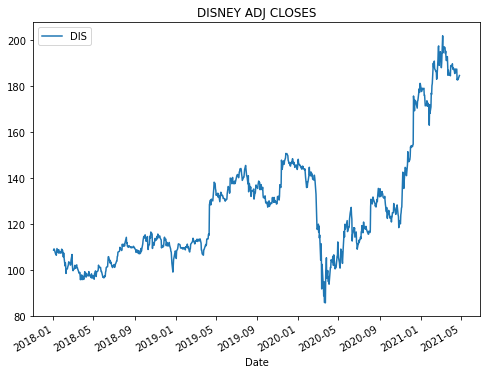

In [4]:
closes_dis.plot(figsize=[8,6])
plt.title('DISNEY ADJ CLOSES')
plt.legend(ticker)
plt.show()

Descarga de los datos de la opción.

In [5]:
dis = web.YahooOptions('DIS')
dis_opt = dis.get_all_data().reset_index()
dis_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,177.5,call,DIS210430C00177500,...,2021-04-28 12:08:07,2021-04-27 17:40:25,"{'contractSymbol': 'DIS210430C00177500', 'stri..."
2021-04-30,217.5,put,DIS210430P00217500,...,2021-04-28 12:08:07,2021-03-16 16:38:35,"{'contractSymbol': 'DIS210430P00217500', 'stri..."
2021-04-30,220.0,call,DIS210430C00220000,...,2021-04-28 12:08:07,2021-04-27 19:34:53,"{'contractSymbol': 'DIS210430C00220000', 'stri..."
2021-04-30,220.0,put,DIS210430P00220000,...,2021-04-28 12:08:07,2021-03-15 04:01:18,"{'contractSymbol': 'DIS210430P00220000', 'stri..."
2021-04-30,195.0,call,DIS210430C00195000,...,2021-04-28 12:08:07,2021-04-27 19:57:20,"{'contractSymbol': 'DIS210430C00195000', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,80.0,put,DIS230120P00080000,...,2021-04-28 12:08:07,2021-04-15 14:58:55,"{'contractSymbol': 'DIS230120P00080000', 'stri..."
2023-01-20,130.0,put,DIS230120P00130000,...,2021-04-28 12:08:07,2021-04-27 18:14:45,"{'contractSymbol': 'DIS230120P00130000', 'stri..."
2023-01-20,230.0,put,DIS230120P00230000,...,2021-04-28 12:08:07,2021-04-21 16:41:58,"{'contractSymbol': 'DIS230120P00230000', 'stri..."


In [6]:
K = 130
indice_opt = dis_opt.loc[(dis_opt.Type=='put') & (dis_opt.Strike==K) & (dis_opt.Expiry=='2023-01-20')]
indice_opt


,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
224,130.0,2023-01-20,put,...,2021-04-28 12:08:07,2021-04-27 18:14:45,"{'contractSymbol': 'DIS230120P00130000', 'stri..."


In [7]:
i_opt = indice_opt.index
opcion_valuar = dis_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.5,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 5528,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619547285,
 'impliedVolatility': 0.062509375,
 'inTheMoney': False}

In [8]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  184.257


### `Simulación usando Rendimiento Simple`

>Suponemos que los rendimientos $r\sim N(\mu,\sigma_{2})$ 

In [10]:
ret = closes_dis.pct_change().iloc[1:]
ret

Symbols,DIS
Date,
2018-01-03,4.293e-03
2018-01-04,-4.452e-04
2018-01-05,-5.435e-03
2018-01-08,-1.433e-02
2018-01-09,-7.272e-04
...,...
2021-04-21,1.751e-03
2021-04-22,-1.911e-03
2021-04-23,1.423e-03


### `Visualización de los rendimientos logaritmicos`

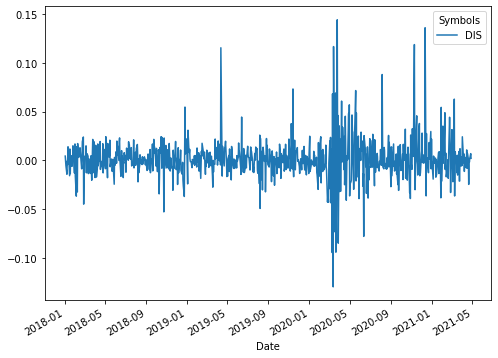

In [28]:
ret.plot(figsize=[8,6]);

>Obtengo la media y su desviación estándar.

In [11]:
mu = ret.mean()[0]
sigma = ret.std()[0]

mu,sigma

(0.0008485852183275683, 0.02077946119297525)

>Obtengo un rango de fechas

In [12]:
from datetime import date

today = pd.to_datetime(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry-today).days
nscen = 1000
dates = pd.date_range(start=today, periods = ndays)
ndays 

632

In [35]:
expiry

Timestamp('2023-01-20 00:00:00')

In [13]:
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07',
               ...
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', length=632, freq='D')

### `Simulación utilizando rendimiento simple`

In [18]:
# Para que sea diario 
dt = 1

Z = np.random.randn(ndays,nscen)

#Simulación de los rendimientos
ret_dt = pd.DataFrame(Z*sigma*np.sqrt(dt)+mu*dt,index=dates)
ret_dt

,0,1,2,...,997,998,999
2021-04-28,-0.013,-0.018,0.038,...,1.956e-02,4.217e-02,-0.001
2021-04-29,0.009,0.023,-0.014,...,1.142e-02,-1.291e-03,0.008
2021-04-30,-0.010,-0.016,0.019,...,5.943e-03,3.273e-02,-0.023
2021-05-01,0.036,0.010,-0.003,...,5.032e-04,2.864e-02,-0.020
2021-05-02,-0.003,-0.005,0.002,...,-2.405e-02,2.789e-02,0.007
...,...,...,...,...,...,...,...
2023-01-15,0.057,0.026,0.020,...,1.170e-03,1.438e-02,0.016
2023-01-16,0.007,0.013,0.018,...,2.150e-02,-3.268e-03,-0.021
2023-01-17,0.022,0.003,-0.059,...,4.142e-03,-1.979e-04,0.022
2023-01-18,-0.009,0.022,0.007,...,-1.149e-02,3.642e-03,0.044


In [20]:
S0 = opcion_valuar.Underlying_Price
np.cumprod(ret_dt+1)

,0,1,2,...,997,998,999
2021-04-28,0.987,0.982,1.038,...,1.020,1.042,0.999
2021-04-29,0.996,1.005,1.023,...,1.031,1.041,1.007
2021-04-30,0.986,0.989,1.043,...,1.037,1.075,0.984
2021-05-01,1.022,0.999,1.040,...,1.038,1.106,0.965
2021-05-02,1.019,0.995,1.042,...,1.013,1.137,0.971
...,...,...,...,...,...,...,...
2023-01-15,1.328,1.006,0.952,...,1.287,1.394,1.746
2023-01-16,1.337,1.019,0.969,...,1.315,1.389,1.709
2023-01-17,1.366,1.021,0.912,...,1.320,1.389,1.747
2023-01-18,1.354,1.044,0.919,...,1.305,1.394,1.823


In [22]:
# Simulando el precio
S_0 = closes_dis.iloc[-1,0]
S_T = S_0*(1+ret_dt).cumprod()

Vizualisación de los precios simulados junto con los precios descargados

Text(0.5, 1.0, 'Simulación de precios usando rendimiento simple')

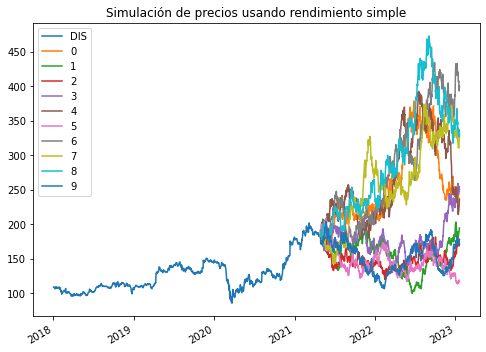

In [23]:
pd.concat([closes_dis,S_T.iloc[:,:10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple')

### `Simulación usando Rendimiento Logaritmico`

In [24]:
# función que obtiene los redimientos logaritmicos
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [25]:
r_log = calc_daily_ret(closes_dis)
r_log

Symbols,DIS
Date,
2018-01-03,4.284e-03
2018-01-04,-4.453e-04
2018-01-05,-5.450e-03
2018-01-08,-1.444e-02
2018-01-09,-7.274e-04
...,...
2021-04-21,1.749e-03
2021-04-22,-1.913e-03
2021-04-23,1.422e-03


### `Visualización de los rendimientos logaritmicos`

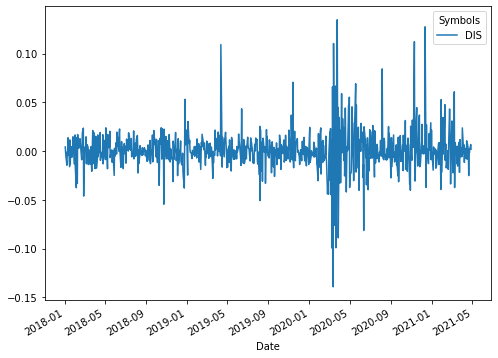

In [27]:
r_log.plot(figsize=[8,6]);

>Media y desviación estándar de los rendimientos logaritmicos

In [29]:
mu_r = r_log.mean()[0]
sigma_r = r_log.std()[0]

mu_r, sigma_r

(0.000634983706960603, 0.02062396943762899)

In [32]:
# simulación del rendimiento
Z = np.random.randn(ndays,nscen)
sim_ret_log = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt),index=dates)
sim_ret_log

,0,1,2,...,997,998,999
2021-04-28,0.007,0.004,-0.043,...,-0.005,0.010,0.002
2021-04-29,0.024,0.021,-0.019,...,-0.042,0.002,0.022
2021-04-30,0.001,0.002,0.032,...,-0.006,-0.013,-0.043
2021-05-01,0.038,-0.021,0.039,...,0.016,-0.035,0.032
2021-05-02,0.019,-0.009,0.022,...,0.023,-0.023,0.045
...,...,...,...,...,...,...,...
2023-01-15,-0.066,0.019,0.007,...,-0.011,0.019,-0.014
2023-01-16,0.001,0.012,0.055,...,0.041,-0.025,0.043
2023-01-17,0.008,0.005,-0.014,...,-0.008,-0.013,-0.010
2023-01-18,0.004,0.005,0.004,...,0.043,-0.007,0.010


In [33]:
# simulación del precio
S_0 = closes_dis.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_log.cumsum())
S_T2.iloc[0,:]=S_0
S_T2

,0,1,2,...,997,998,999
2021-04-28,184.640,184.640,184.640,...,184.640,184.640,184.640
2021-04-29,190.505,189.360,173.603,...,176.138,186.831,189.229
2021-04-30,190.777,189.802,179.249,...,175.033,184.388,181.276
2021-05-01,198.148,185.940,186.426,...,177.912,177.991,187.124
2021-05-02,202.039,184.205,190.615,...,182.113,173.919,195.641
...,...,...,...,...,...,...,...
2023-01-15,299.904,203.407,843.972,...,542.124,384.227,284.070
2023-01-16,300.349,205.880,891.904,...,565.004,374.760,296.407
2023-01-17,302.897,206.902,879.353,...,560.224,369.775,293.463
2023-01-18,304.242,208.028,883.062,...,584.575,367.037,296.312


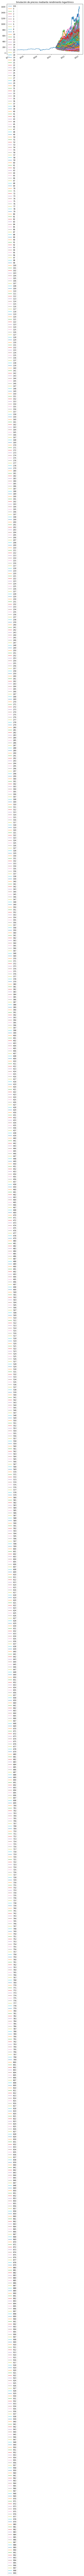

In [34]:
# precios simulados con los precios descargados
pd.concat([closes_dis,S_T2]).plot(figsize=[8,6])
plt.title('Smulación de precios mediante rendimiento logaritmico')
plt.show()

Encontar el valor de la opción según su función de pago en este caso para una put es la siguiente:

$$ max(K-S_T,0)$$

### `Valuación usando el modelo de Black & Scholes`

Supuestos del modelo:

1. El comportamiento del precio de la acción corresponde al modelo logarítmico normal, con $\mu$ y $\sigma$
constantes.
2. No hay costos de transición ni impuestos. Todos los títulos son perfectamente divisibles.
3. No hay dividendos sobre la acción durante la vida de la opción.
4. No hay oportunidades de arbitraje libres de riesgo.
5. La negociación de valores es continua.
6. Los inversionistas pueden adquirir u otorgar préstamos a la misma tasa de interés libre de riesgo.
7. La tasa de interés libre de riesgo a corto plazo, r, es constante.


Ya que estamos en un mundo neutral al riesgo ( a un año) tomamos la tasa libre de riesgo y no la media.

La tomo de:  https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [36]:
r = (0.006/100)/360

Simulo el tiempo de contato desde HOY hasta la fecha de Expiración con 10 escenarios.

In [41]:
nscen = 10
sim_ret = pd.DataFrame(sigma_r*np.random.randn(ndays,nscen)+r,index=dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-04-28,0.001,-0.003,-0.010,...,0.017,-0.015,-0.008
2021-04-29,-0.009,-0.015,-0.026,...,0.036,0.007,-0.034
2021-04-30,-0.028,0.002,-0.042,...,0.052,0.018,-0.018
2021-05-01,-0.030,-0.002,0.014,...,0.017,0.028,-0.010
2021-05-02,-0.016,0.002,0.015,...,0.031,0.047,-0.022
...,...,...,...,...,...,...,...
2023-01-15,0.006,-0.252,0.416,...,-0.765,0.539,-0.843
2023-01-16,0.029,-0.264,0.399,...,-0.781,0.527,-0.825
2023-01-17,0.024,-0.268,0.404,...,-0.803,0.536,-0.815
2023-01-18,0.037,-0.262,0.375,...,-0.811,0.501,-0.840


Despúes de simular los rendimientos, calculo los escenarios de precios.

In [42]:
S0 = closes_dis.iloc[-1,0]
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:]
sim_closes

,0,1,2,...,7,8,9
2021-04-28,184.885,184.014,182.852,...,187.735,181.803,183.146
2021-04-29,182.976,181.852,179.956,...,191.397,185.887,178.530
2021-04-30,179.576,185.093,176.967,...,194.501,188.059,181.379
2021-05-01,179.248,184.335,187.243,...,187.853,189.791,182.832
2021-05-02,181.642,184.974,187.491,...,190.403,193.435,180.631
...,...,...,...,...,...,...,...
2023-01-15,185.829,143.470,279.978,...,85.915,316.463,79.444
2023-01-16,190.151,141.816,275.139,...,84.540,312.686,80.916
2023-01-17,189.051,141.269,276.465,...,82.741,315.521,81.692
2023-01-18,191.639,142.063,268.649,...,82.036,304.783,79.708


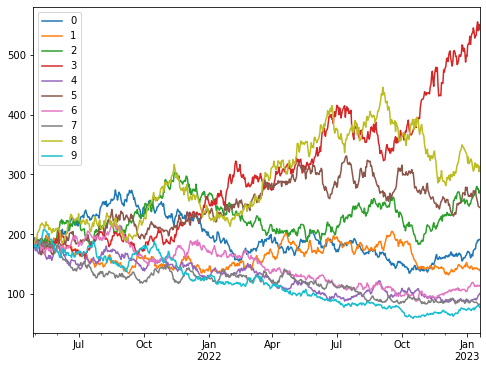

In [43]:
sim_closes.plot(figsize=(8,6));

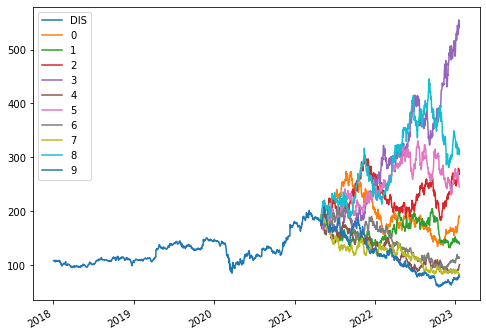

In [45]:
# precios simulados 

pd.concat([closes_dis,sim_closes]).plot(figsize=(8,6));